<a href="https://colab.research.google.com/github/gaurav-hegde/CatsOrDogs/blob/main/ImageClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dataset

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

# Importing Libraries

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Creating Generators

In [7]:
training_data = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

testing_data = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Normalization of data

In [8]:
def normalize(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

training_data = training_data.map(normalize)
testing_data = testing_data.map(normalize)

# Creating the CNN Model

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

# Compiling the model

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the data

In [15]:
history = model.fit(training_data, epochs=10, validation_data=testing_data)

Epoch 1/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1786 - accuracy: 0.9109 - val_loss: 1.0426 - val_accuracy: 0.7462
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1529 - accuracy: 0.9264 - val_loss: 0.7712 - val_accuracy: 0.8096
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1333 - accuracy: 0.9338 - val_loss: 0.7400 - val_accuracy: 0.7926
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.1121 - accuracy: 0.9448 - val_loss: 0.7841 - val_accuracy: 0.8190
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1079 - accuracy: 0.9465 - val_loss: 1.0621 - val_accuracy: 0.7948
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0986 - accuracy: 0.9509 - val_loss: 1.4575 - val_accuracy: 0.7620
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0955 - accuracy: 0.9542 - val_loss: 0.8011 - val_ac

# Plotting the accuracy and loss of the model

<function matplotlib.pyplot.show(close=None, block=None)>

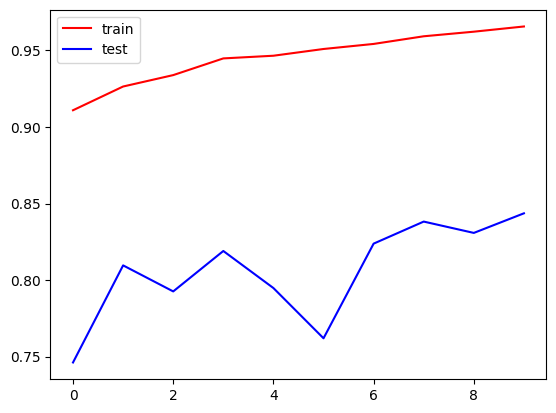

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label='test')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

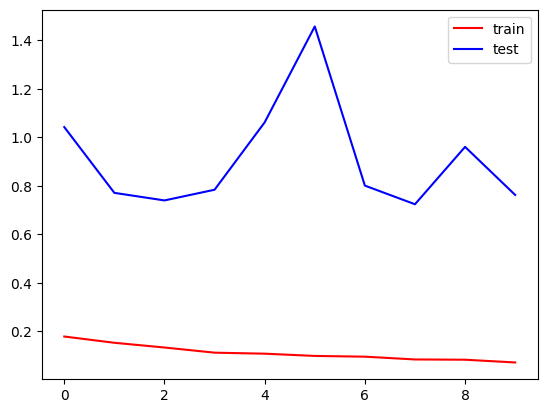

In [18]:
plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color = 'blue', label='test')
plt.legend()
plt.show

# Testing

In [19]:
import cv2

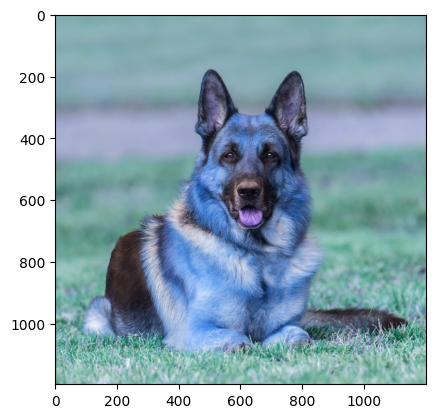

In [20]:
test = cv2.imread('/content/dog.jpeg')
plt.imshow(test)

In [21]:
test.shape

(1196, 1200, 3)

In [22]:
#Resizing and reshaping

test = cv2.resize(test, (256, 256))
test = test.reshape(1, 256, 256, 3)

In [23]:
test.shape

(1, 256, 256, 3)

In [25]:
animal = model.predict(test)

1/1 [==============================] - 0s 19ms/step


In [27]:
if animal == 0:
  print('Dog')
else:
  print('Cat')

Dog


In [38]:
test_cat = cv2.imread('/content/cat.jpg')

test_cat = cv2.resize(test_cat, (256, 256))
test_cat = test_cat.reshape(1, 256, 256, 3)

animal = model.predict(test_cat)

if animal == 0:
  print('Dog')
else:
  print('Cat')


1/1 [==============================] - 0s 24ms/step
Cat
